## 过拟合与欠拟合

### 获取并绘制数据集

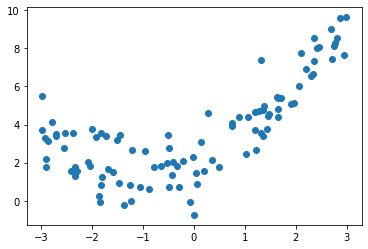

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

### 线性拟合

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg=LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

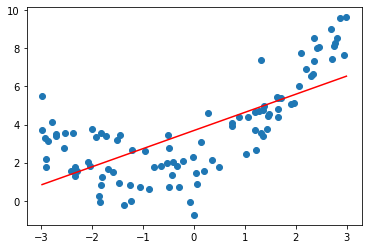

In [4]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

### 多项式拟合

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

In [11]:
poly2_reg = PolynomialRegression(degree=10)
poly2_reg.fit(X, y)

y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.050846676376416

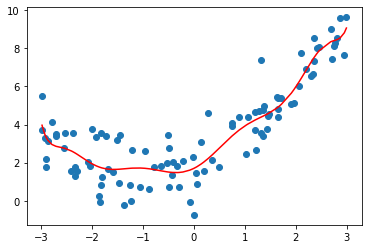

In [12]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

### 交叉验证

In [13]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate # 交叉验证所需的函数
from sklearn.model_selection import KFold,LeaveOneOut,LeavePOut,ShuffleSplit # 交叉验证所需的子集划分方法
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit # 分层分割
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut,LeavePGroupsOut,GroupShuffleSplit # 分组分割
from sklearn.model_selection import TimeSeriesSplit # 时间序列分割
from sklearn import datasets  # 自带数据集
from sklearn import svm  # SVM算法
from sklearn import preprocessing  # 预处理模块
from sklearn.metrics import recall_score  # 模型度量

### 网格搜索